In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pygimli.physics import SIP
import pybert as pb

In [6]:
def compareTDFD(f=None, t=None, taus=None, **synthCC):
    # %% define Cole-Cole model
    synthCC.setdefault("rho", 1)
    t = t or np.logspace(-2, 0.6, 30)
    f = f or np.logspace(-2, 2, 40)
    taus = taus or np.logspace(-3, +2, 100)
    decay = pb.Decay(t=t)
    decay.v = decay.simulate(**synthCC)
    decay.invert()
    decay.decompose(error=0.01, tau=taus)
    rhoC = SIP.modelColeColeRho(f, **synthCC)
    spec = SIP.SIPSpectrum(f=f, amp=np.abs(rhoC), phi=-np.angle(rhoC))
    spec.fitColeCole()
    spec.fitDebyeModel(tau=taus, new=False)   
    fig, ax = plt.subplots()
    ax.semilogx(taus, decay.modelDD, "x-", label="TD")
    ax.semilogx(taus, spec.mDD, "+-", label="FD")
    ax.grid()
    ax.legend()
    print("Cole-Cole")
    keys = list(synthCC.keys())
    for i in range(-3, 0):
        key = keys[i]
        print(key, synthCC[key], decay.modelCC[i], spec.mCC[i])
        # print(synthCC)
    print("Debye")
    print("logMeanTau=", decay.logMeanTau(), spec.logMeanTau())
    return decay, spec



Cole-Cole
tau 0.3 0.19999813334563088 0.1999983019993674
c 0.25 0.30002259898960115 0.29999087241806544
rho 1 0.25000211056400845 0.2500025889380684
Debye
logMeanTau= 0.6799007190186837 0.2780956036203586


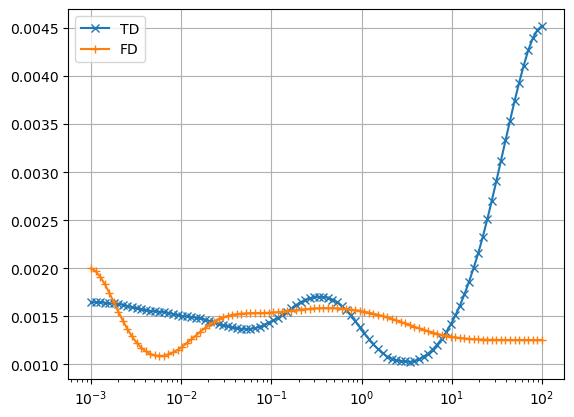

In [7]:
decay, spec = compareTDFD(m=0.2, tau=0.3, c=0.25)

In [ ]:
decay.showAll(xScale="log", yScale="log")
spec.showAll()